# Module Test Template

## Module & Test Description

This Notebook is used to test positive and negative moment segments of PM diagram.

### Imports
##### General Imports

In [1]:
import os, sys, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import shapely as sh

##### Extend PYPATH to current folder:
This allows importing libraries from the same folder; <code>pathlib.Path().resolve()</code> returns the path of the current directory.

In [2]:
sys.path.extend([pathlib.Path().resolve()])

Import specific testing modules:

In [3]:
import rccolumn
import rcmaterials
import rcutilities

rcmaterials <version 0.0.6> successfully imported
rccolumn <version 0.0.4> successfully imported
rcutilities <version 0.0.1> successfully imported


## Input Values for Test Column Section

In [4]:
c_comp = rccolumn.CCOMP
c_tens = rccolumn.CTENS

concrete = rcmaterials.ConcreteMaterial(5000)
bw = 16
h = 16

rebar = rcmaterials.RebarMaterial(60000)

## Curve at Positive Moment Side

In [5]:
layer_distances = np.array([2.5, 13.5])
layer_bar_sizes = np.array([9, 9])
layer_bar_counts = np.array([4, 2])

d = max(layer_distances)
d

13.5

In [6]:
layer_areas = rccolumn.get_layer_areas(layer_bar_sizes, layer_bar_counts, rebar)
layer_areas

array([4., 2.])

In [7]:
# Generate data for positive bending curve:
zs_pos = rccolumn.get_half_zs(bw, h, layer_distances, layer_areas, concrete, rebar)
cs_pos = rccolumn.get_half_cs(zs_pos, max(layer_distances), concrete, rebar)
p1, m1, strain1 = rccolumn.get_half_pm_points(cs_pos, bw, h, layer_distances, layer_areas, concrete, rebar)
p1 /= 1000
m1 /= 12000
m1 *= -1

In [8]:
# Generate the positive design curve:
p1d, m1d = rccolumn.get_design_pm_points(cs_pos, bw, h, layer_distances, layer_areas, concrete, rebar)
p1d /= 1000
m1d /= 12000
m1d *= -1

In [9]:
# Generate the positive design curve but with the top NOT cut off, so we can see it dashed
p1dc, m1dc = rccolumn.get_design_pm_points(cs_pos, bw, h, layer_distances, layer_areas, concrete, rebar, is_capped=False)
p1dc /= 1000
m1dc /= 12000
m1dc *= -1

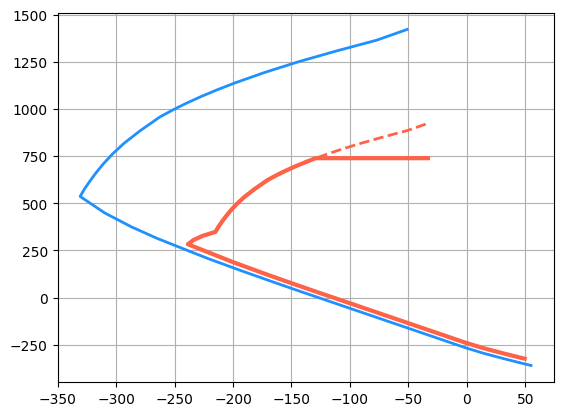

In [10]:
plt.plot(m1, p1, color="dodgerblue", linewidth=2)
plt.plot(m1d, p1d, color="tomato", linewidth=3)
plt.plot(m1dc, p1dc, color="tomato", linewidth=2, linestyle="dashed")
#plt.xlim([-50,500])
plt.grid()

## Curve at Negative Moment Side

In [11]:
rev_layer_distances = rccolumn.reverse_layers(h, layer_distances)
rev_layer_distances

array([ 2.5, 13.5])

In [12]:
rev_bar_sizes = np.flip(layer_bar_sizes)
rev_bar_counts = np.flip(layer_bar_counts)
rev_bar_sizes, rev_bar_counts

(array([9, 9]), array([2, 4]))

In [13]:
# Verify the flip didn't effect the original: numpy.flip should make a deep copy of the arrays
layer_bar_sizes, layer_bar_counts

(array([9, 9]), array([4, 2]))

In [14]:
rev_d = max(rev_layer_distances)
rev_d

13.5

In [15]:
rev_layer_areas = rccolumn.get_layer_areas(rev_bar_sizes, rev_bar_counts, rebar)
rev_layer_areas

array([2., 4.])

In [16]:
# With the reverse, it should be okay to simply flip
rev_layer_areas = np.flip(layer_areas)
rev_layer_areas

array([2., 4.])

In [17]:
# Generate data for negative bending curve:
zs_neg = rccolumn.get_half_zs(bw, h, rev_layer_distances, rev_layer_areas, concrete, rebar)
cs_neg = rccolumn.get_half_cs(zs_neg, max(rev_layer_distances), concrete, rebar)
p1r, m1r, strain1r = rccolumn.get_half_pm_points(cs_neg, bw, h, rev_layer_distances, rev_layer_areas, concrete, rebar)
p1r /= 1000
m1r /= 12000
m1r *= 1

In [18]:
# Generate the negative design curve:
p1dr, m1dr = rccolumn.get_design_pm_points(cs_neg, bw, h, rev_layer_distances, rev_layer_areas, concrete, rebar)
p1dr /= 1000
m1dr /= 12000
m1dr *= 1

In [19]:
# Generate the negative design curve but with the top NOT cut off, so we can see it dashed
p1dcr, m1dcr = rccolumn.get_design_pm_points(cs_neg, bw, h, rev_layer_distances, rev_layer_areas, concrete, rebar, is_capped=False)
p1dcr /= 1000
m1dcr /= 12000
m1dcr *= 1

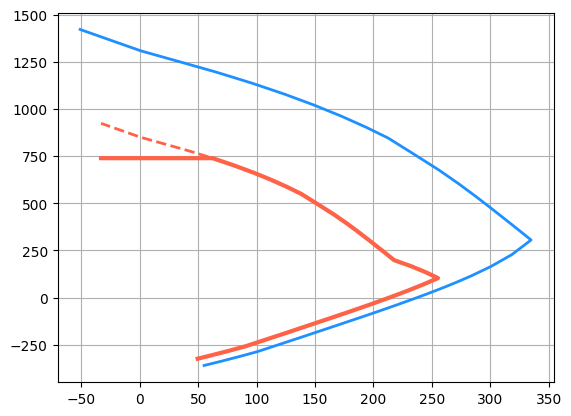

In [20]:
plt.plot(m1r, p1r, color="dodgerblue", linewidth=2)
plt.plot(m1dr, p1dr, color="tomato", linewidth=3)
plt.plot(m1dcr, p1dcr, color="tomato", linewidth=2, linestyle="dashed")
plt.grid()

## Combined Both Halves

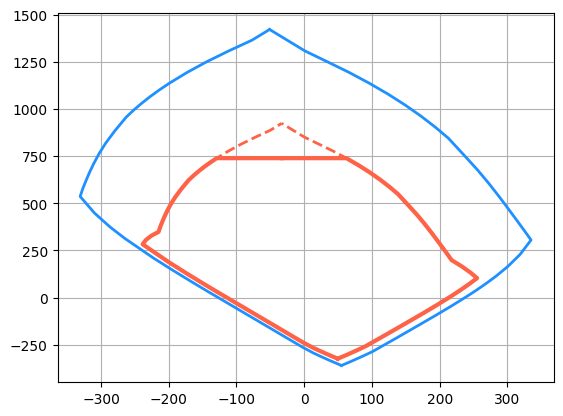

In [21]:
plt.plot(m1, p1, color="dodgerblue", linewidth=2)
plt.plot(m1d, p1d, color="tomato", linewidth=3)
plt.plot(m1dc, p1dc, color="tomato", linewidth=2, linestyle="dashed")

plt.plot(m1r, p1r, color="dodgerblue", linewidth=2)
plt.plot(m1dr, p1dr, color="tomato", linewidth=3)
plt.plot(m1dcr, p1dcr, color="tomato", linewidth=2, linestyle="dashed")
plt.grid()